<a href="https://colab.research.google.com/github/alangaurav/DAV15714/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8: Regression modelling
- Linear regression
- Mult linear regression
- Polynomial regression
- Multi variate polynomial regression

## Standard Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

## Linear Regression

Coeffecients of the linear model: [[10.58040081]]
MSE: 4150.6801893299835
R2: 0.19057346847560142


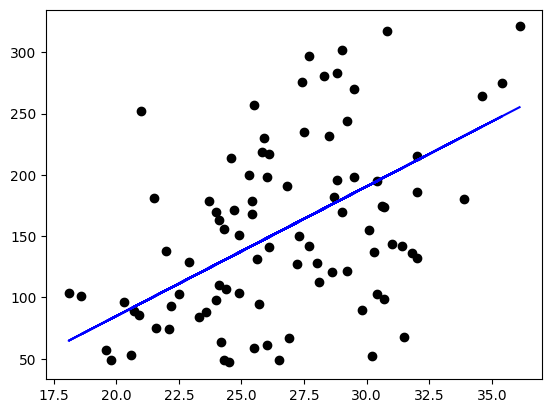

In [4]:
# Linear Regression model using diabetes data
diabetes = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Eight/data/diabetes2.xlsx')
diabetes.head()

# Target variable: Y
# Feature set: BMI

X = pd.DataFrame(diabetes['BMI'])
y = pd.DataFrame(diabetes['Y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Coeffs of linear model:
print(f'Coeffecients of the linear model: {model.coef_}')

# Evaluate
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')

# Scatter plot of BMI vs. Y
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_preds, color='blue')
plt.show()

## Multilinear Regression

Coeffecients of the linear model: [[ 6.43593405 -0.2039508   0.87780589 -0.81968321  0.42781521  0.25819823
   4.99286125 67.3458678   0.08228077]]
MSE: 3504.4740345031773
R2: 0.3165905024778316


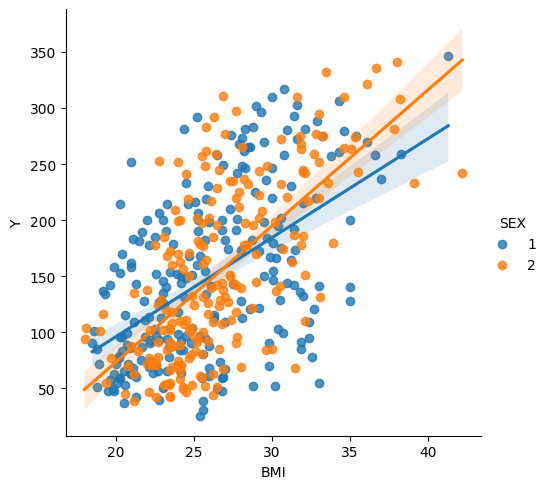

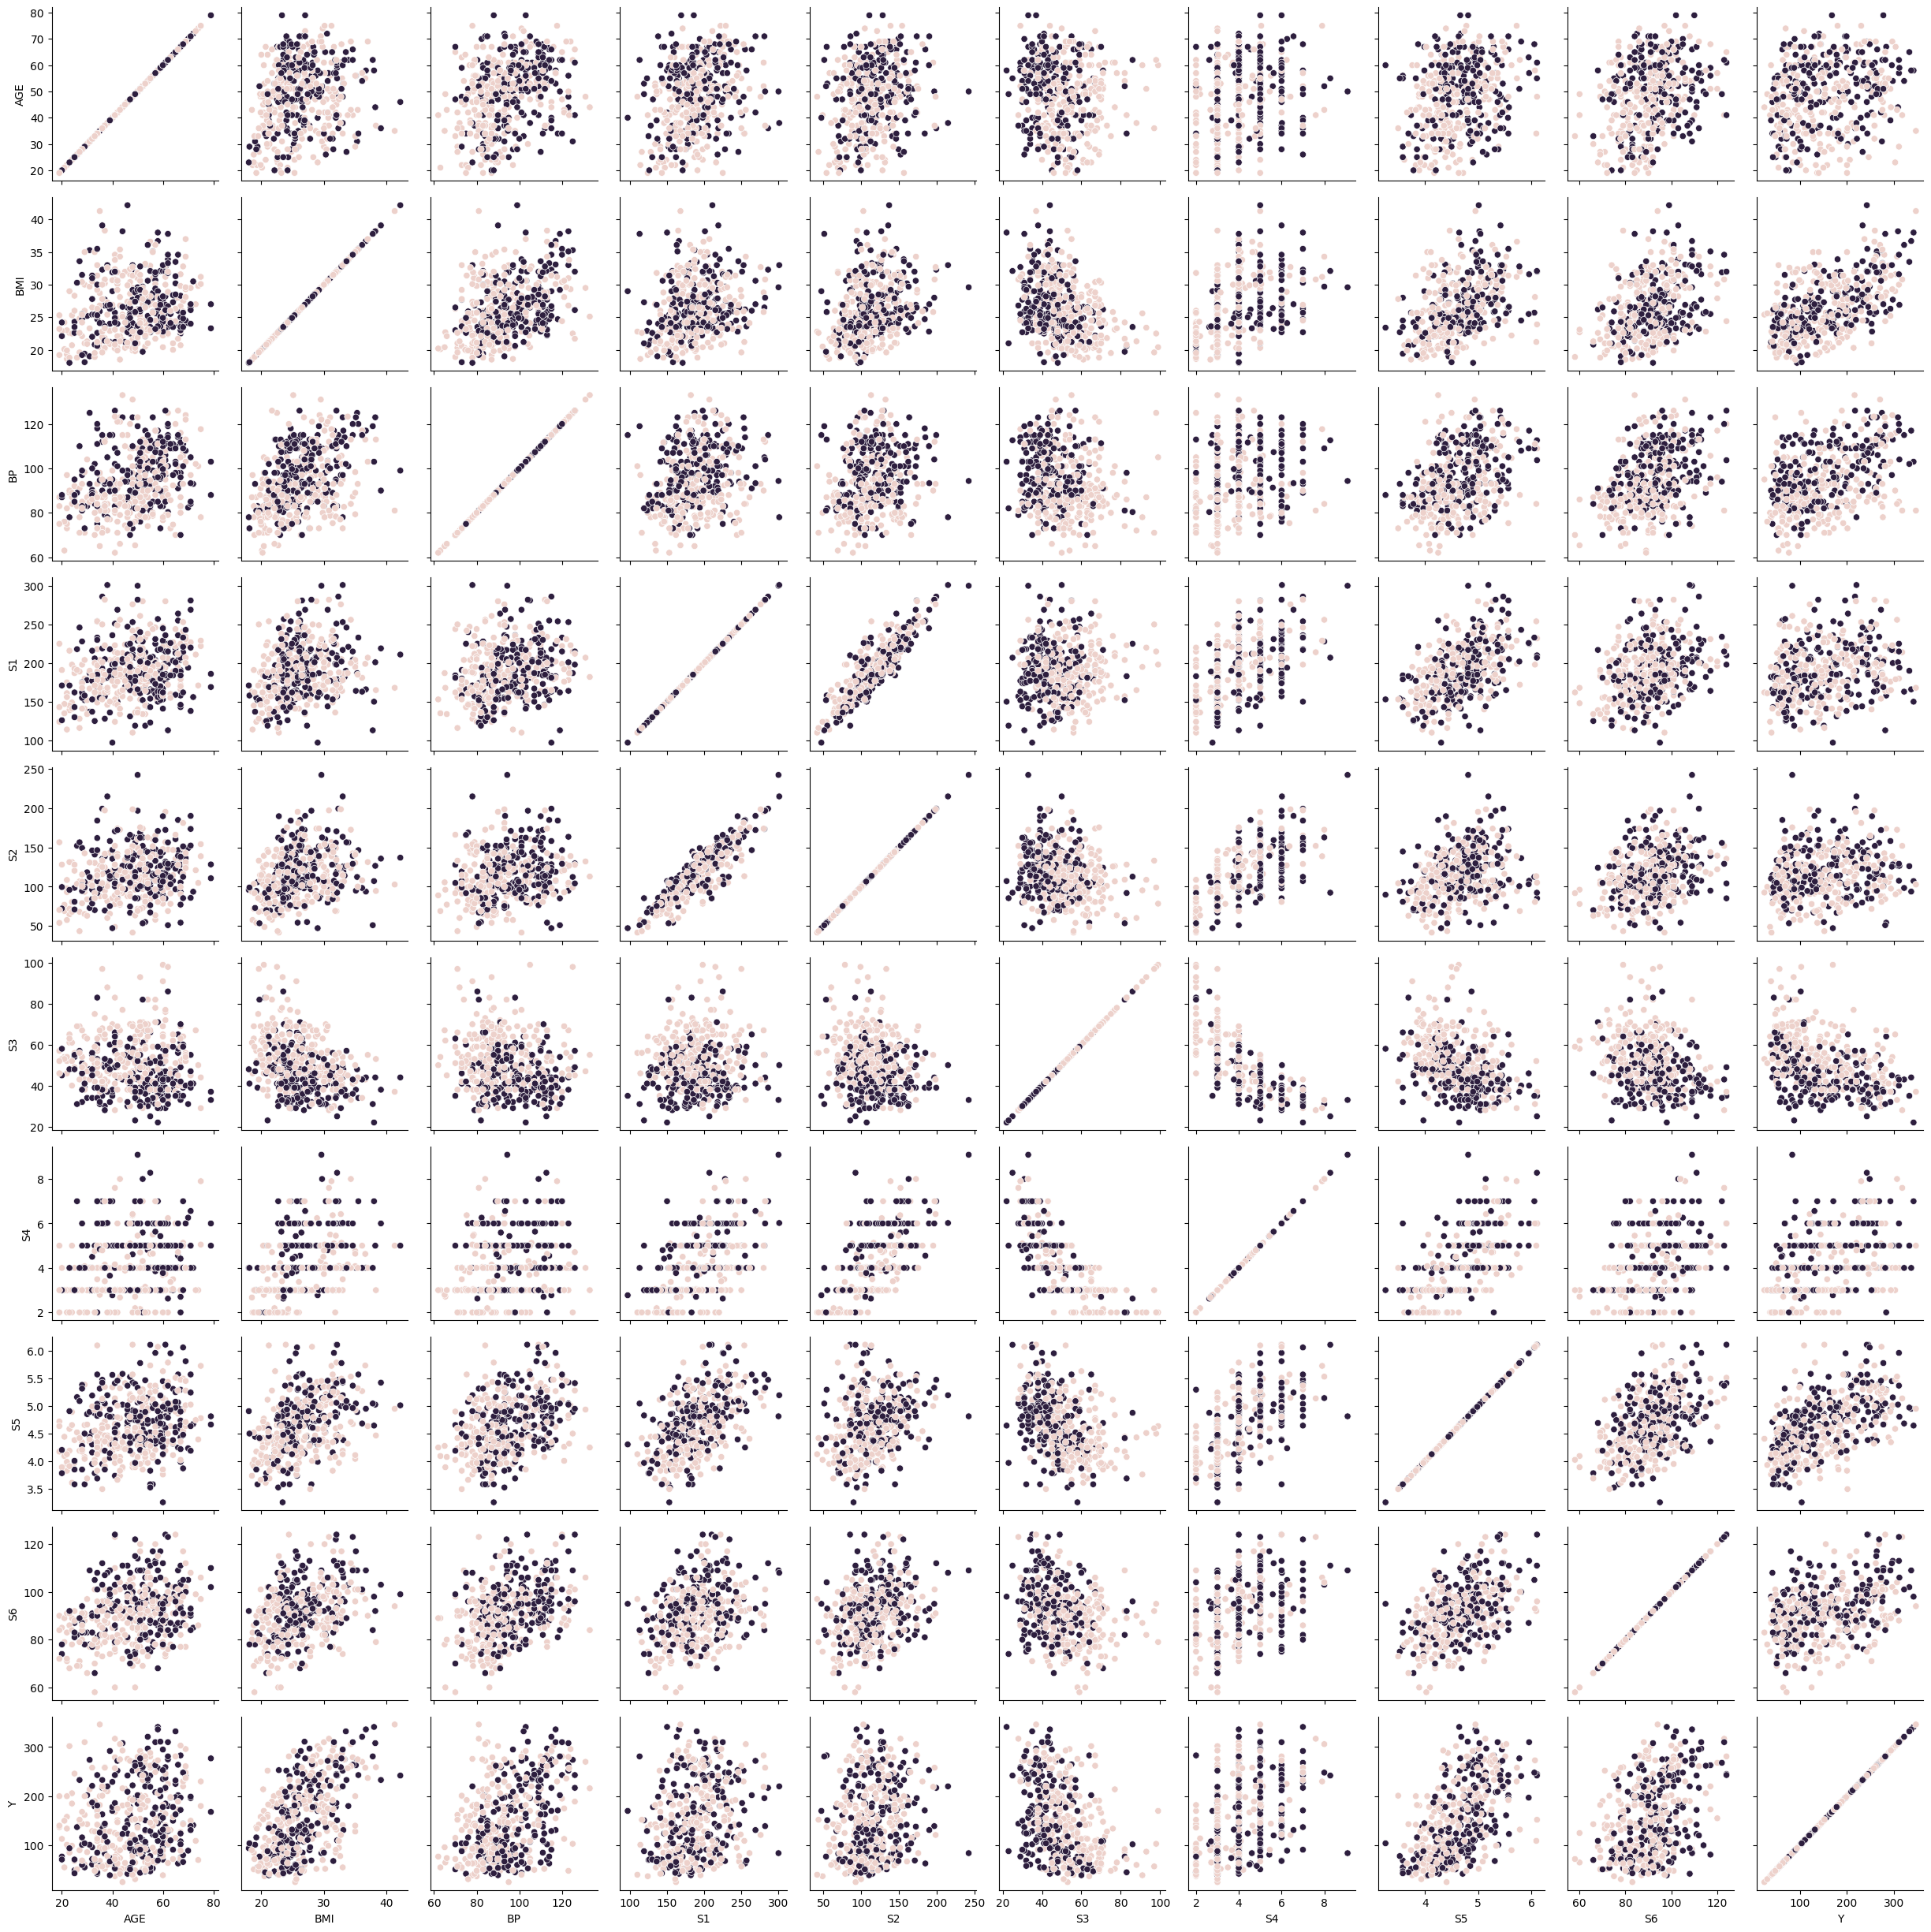

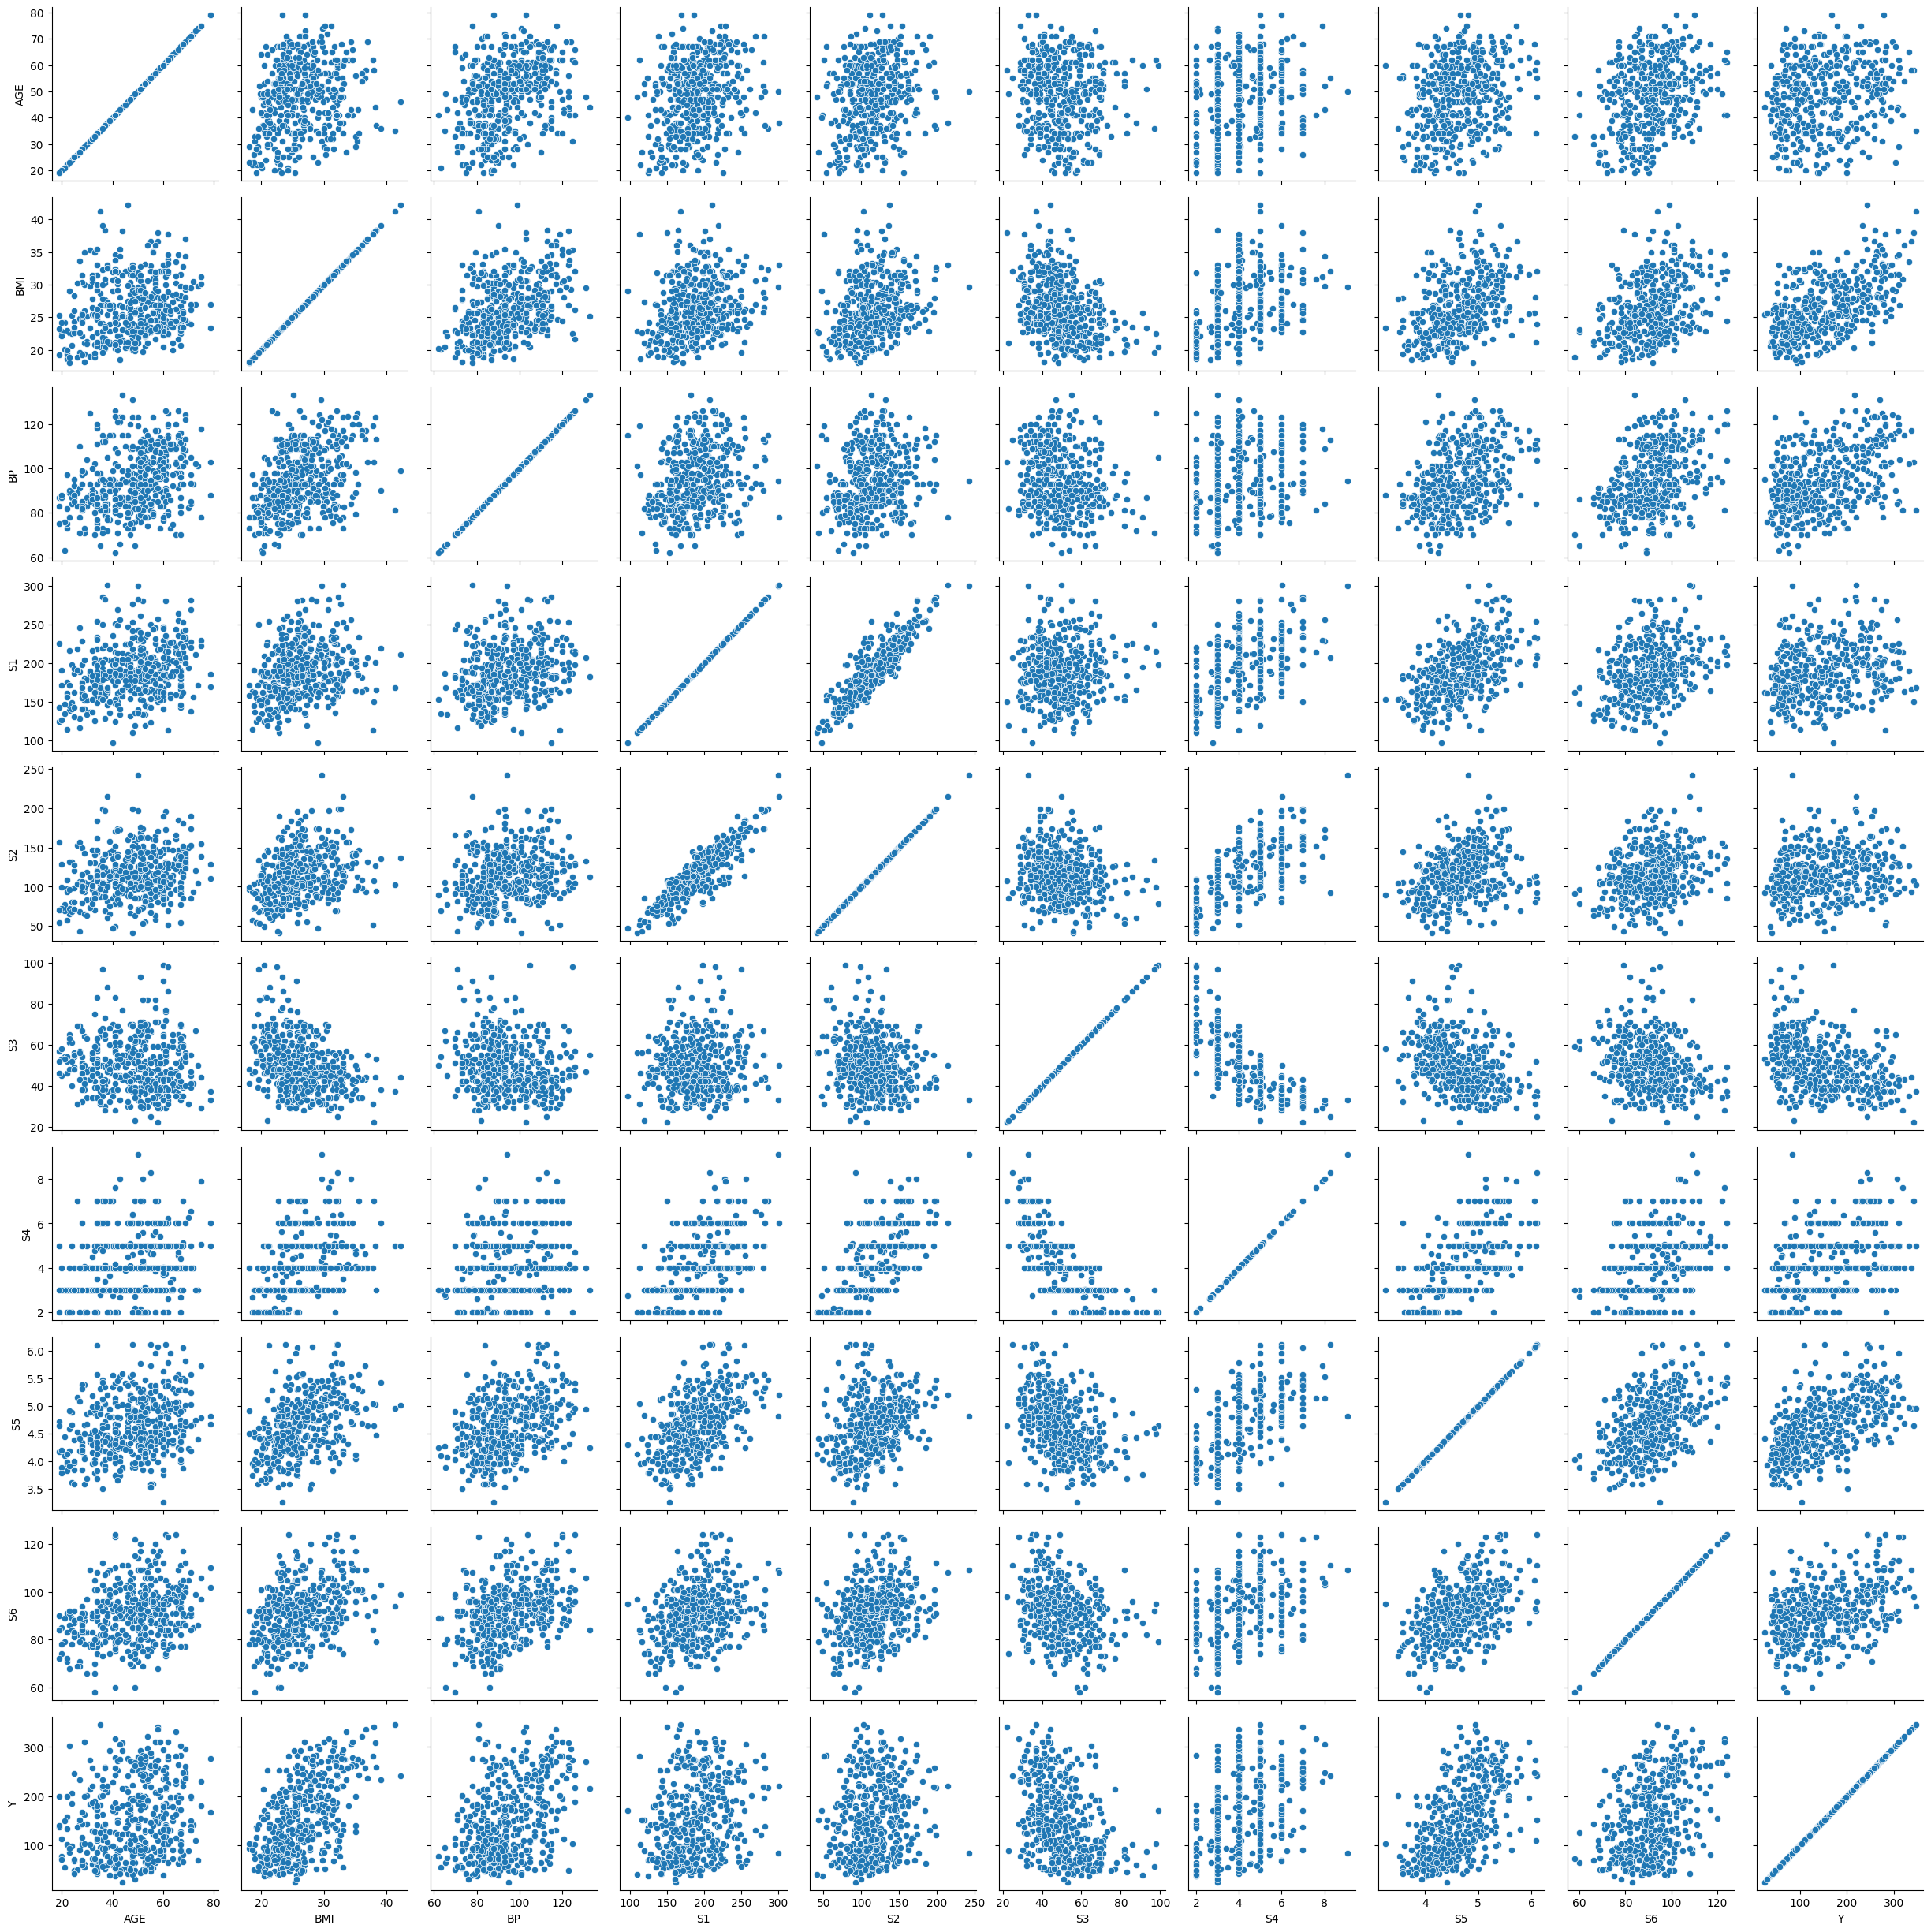

In [5]:
# Multilinear Regression

# Target variable: Y
# Feature set: BMI, AGE, BP, S1, S2, S3, S4, S5, S6
X = diabetes[['BMI', 'AGE', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = pd.DataFrame(diabetes['Y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Coeffs of linear model:
print(f'Coeffecients of the linear model: {model.coef_}')

# Evaluate
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')

# Data visualisation using sns
# Plot BMI and Y by Sex
graph = sns.lmplot(
    data=diabetes,
    x="BMI", y="Y", hue="SEX",
    height=5
)
# Use more informative axis labels than are provided by default
graph.set_axis_labels("BMI", "Y")

#Pairwise plot by SEX
graph = sns.PairGrid(diabetes, hue = "SEX")
graph.map(sns.scatterplot)

#Pairwise plot
graph = sns.PairGrid(diabetes.drop('SEX', axis=1))
graph.map(sns.scatterplot)

## Logistic Regression

           pregNo     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

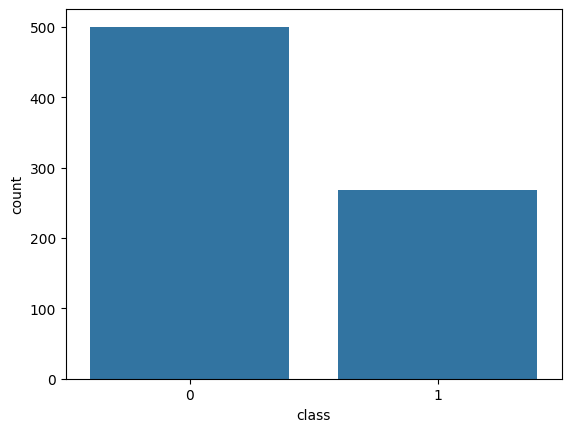

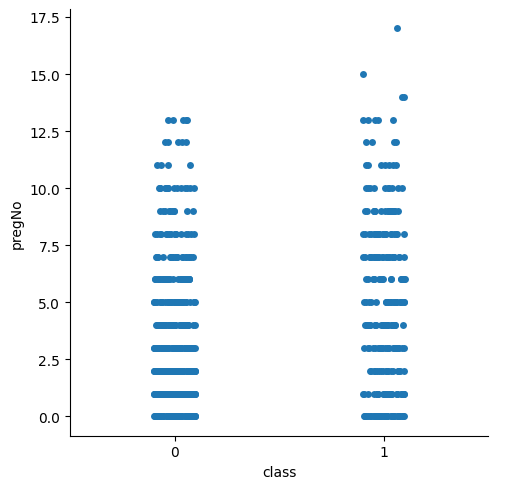

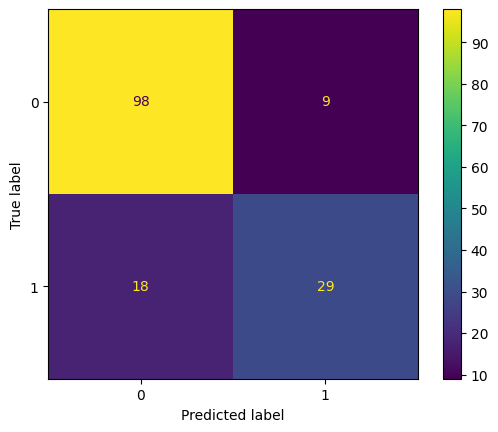

MSE: 0.17532467532467533
R2: 0.1731954662954862
ROC 0.7664545635315172
AUC after threshold optimisation: 0.7664545635315172


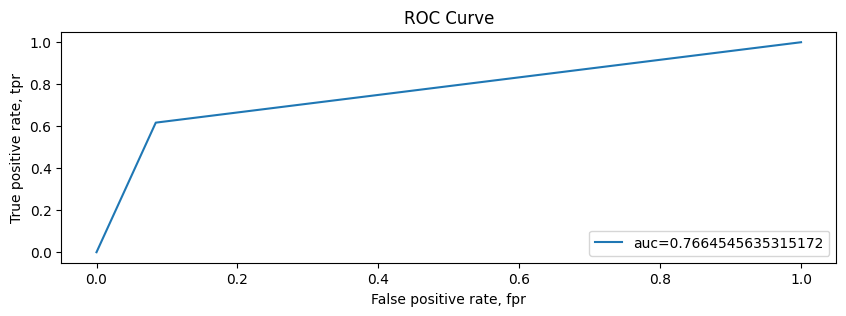

In [6]:
# Logistic regression with ROC/AUC
pima = pd.read_excel('/content/drive/MyDrive/DAV Lab/Week Eight/data/pima-indians-diabetes.xlsx')
pima.head()
print(pima.describe())
print(pima.info())
print(pima['class'].value_counts())

# VIsualise the data
sns.countplot(pima, x='class')
sns.catplot(pima, x='class', y='pregNo')

# Target variable: class
# Feature set: pregNo	glucose	bp	skin	insulin	bmi	pedigree	age
X = pima.drop('class', axis=1)
y = pima['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Coeffs of linear model:
print(f'Coeffecients of the logistic model: {model.coef_}')

# Evaluate
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
cm.plot()
plt.show()
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')
roc = roc_auc_score(y_test, y_preds)
print(f'ROC {roc}')
fpr, tpr, thresh = roc_curve(y_test, y_preds)
AUC = metrics.auc(fpr, tpr)
print(f'AUC after threshold optimisation: {AUC}')

plt.figure(figsize=(10,3))
plt.plot(fpr,tpr, label = "auc="+str(AUC))
plt.xlabel('False positive rate, fpr')
plt.ylabel('True positive rate, tpr')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<ipython-input-7-b278b9064213>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris, palette='hls')


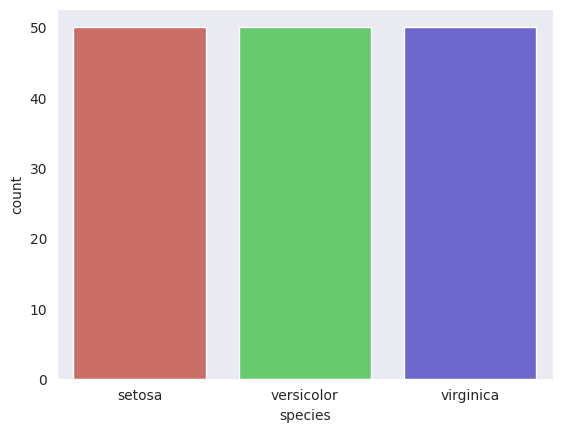

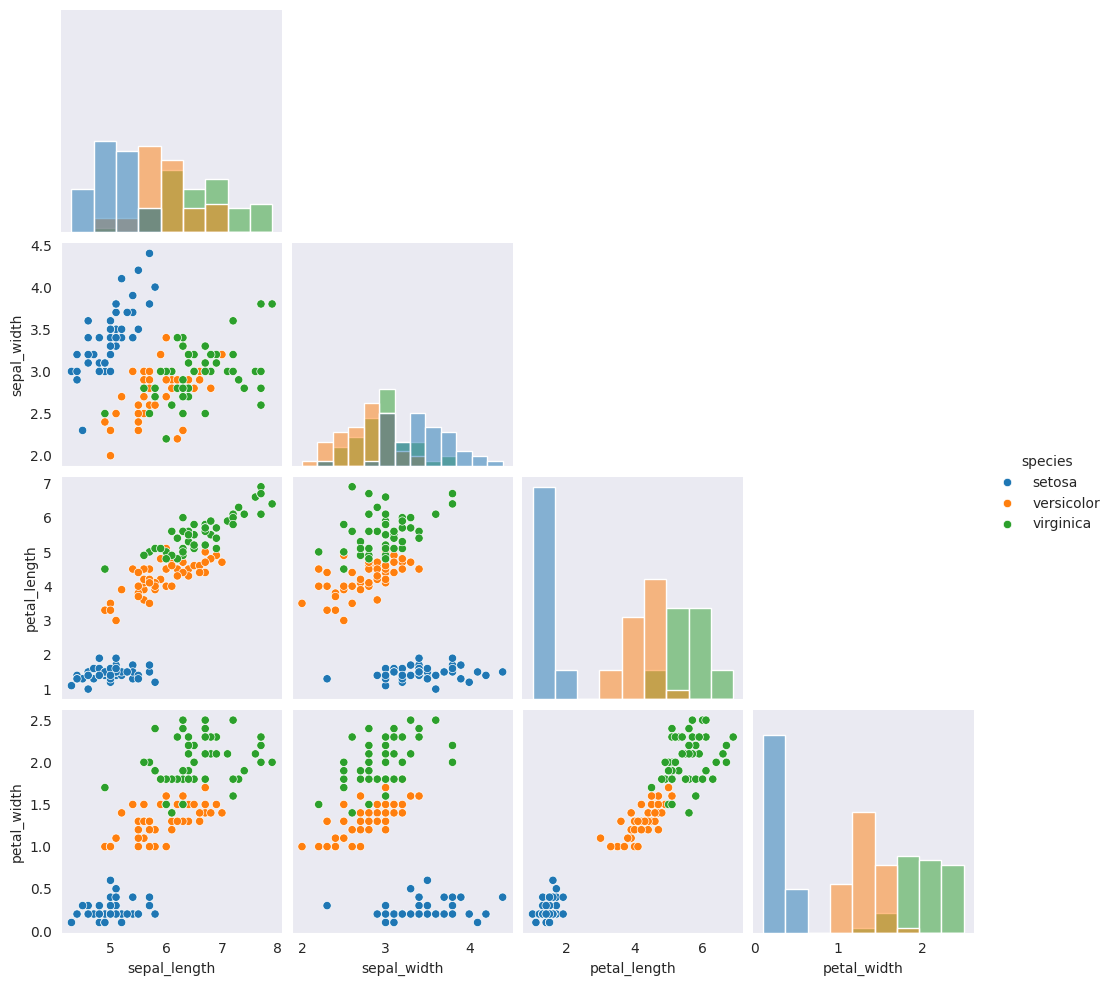

Coeffecients of the logistics model: [[-0.3926827   0.84740104 -2.36028718 -1.01123477]
 [ 0.41063847 -0.31803624 -0.14880033 -0.7829388 ]
 [-0.01795577 -0.5293648   2.50908751  1.79417357]]


In [7]:
# Logistic Regression
iris = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Eight/data/iris.txt', delimiter=',')
iris.head()

print(iris['species'].value_counts())
# Visualise data
sns.set_style('dark')
sns.countplot(x='species', data=iris, palette='hls')
plt.show()

sns.pairplot(iris, hue='species', kind='scatter', diag_kind='hist', corner='True')
plt.show()

# Target variable: species
# Feaure set: sepal_length	sepal_width	petal_length	petal_width
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Coeffs of linear model:
print(f'Coeffecients of the logistics model: {model.coef_}')

## Logarithmic and Exponential Regression

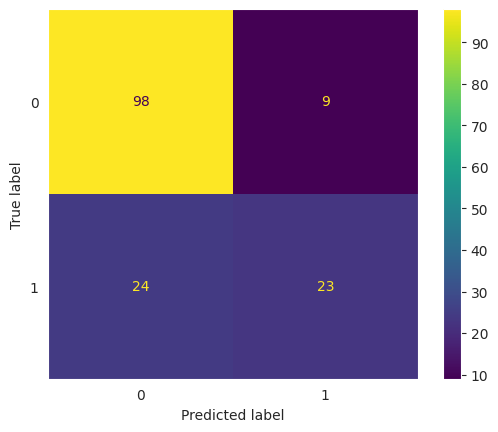

MSE: 0.21428571428571427
R2: -0.01053887452773905
Precision: 0.71875
Recall: 0.48936170212765956
ROC 0.7026247762974746


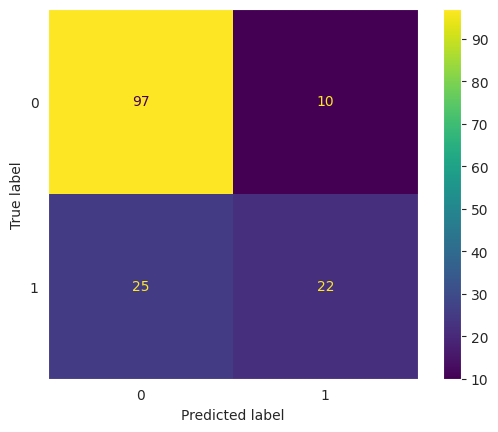

MSE: 0.22727272727272727
R2: -0.07178365480214755
Precision: 0.6875
Recall: 0.46808510638297873
ROC 0.6873135812288724


In [8]:
# Logarithmic Regression
# This doesn;t actually exists, essentailly you change your feature and target variables
# using a log function and then carry out logistic regression

# Target variable: class
# Feature set: glucose, bp
X = pima[['glucose', 'bp']]
y = pima['class']

# Log transforms
Xl = np.log1p(X)
# Exponential transforms: random exponential function
Xe = np.exp((X + abs(X.min()))/200)

# Log based model
X_train, X_test, y_train, y_test = train_test_split(Xl, y, train_size=0.8, random_state=0)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Evaluation
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
cm.plot()
plt.show()
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')
prec = precision_score(y_test, y_preds)
print(f'Precision: {prec}')
recall = recall_score(y_test, y_preds)
print(f'Recall: {recall}')
roc = roc_auc_score(y_test, y_preds)
print(f'ROC {roc}')


# Exponential based model
X_train, X_test, y_train, y_test = train_test_split(Xe, y, train_size=0.8, random_state=0)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Evaluation
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
cm.plot()
plt.show()
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')
prec = precision_score(y_test, y_preds)
print(f'Precision: {prec}')
recall = recall_score(y_test, y_preds)
print(f'Recall: {recall}')
roc = roc_auc_score(y_test, y_preds)
print(f'ROC {roc}')

## Polynomial Regression

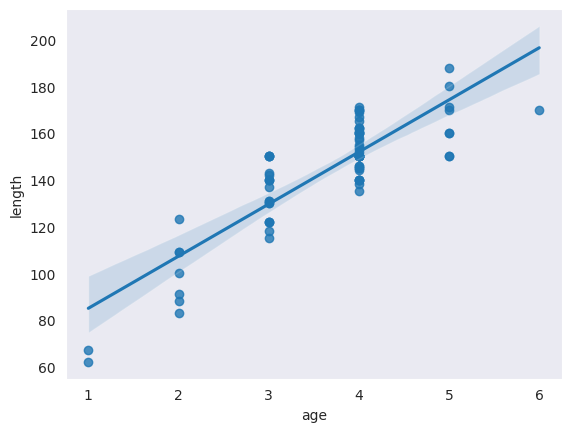

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid

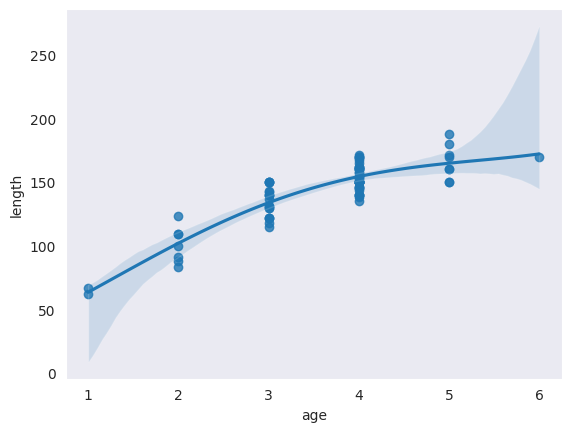

Model coeffecients: [ 0.         36.07186949  4.06337335 -1.62437254  0.10247931]
MSE: 88.23595206706557
R2: 0.7848741666075641


In [9]:
# Polynomial Regression
# This is done by preprocessing features to fit a polynomial.
gills = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Eight/data/bluegills.txt', delimiter='\t')
gills.head()

X = pd.DataFrame(gills['age'])
y = gills['length']

# Data Visualisation
sns.regplot(x=X, y=y)
plt.show()

# Conversion to polynomial set
polyp = PolynomialFeatures(degree=4)
Xp = polyp.fit_transform(X)

# Data visualisation
sns.regplot(x=X, y=y, order=4)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(Xp, y, train_size=0.7)

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Model informaiton
print(f'Model coeffecients: {model.coef_}')

# Evaluation
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')


## Multivariate Polynomial Regression

In [10]:
# Multivariate polynomial regression
boston = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Eight/data/boston.txt', delimiter=',')
boston.head()

# Target variable: medv
# Feature set: crim, lstat
X = boston[['crim', 'lstat']]
y = boston['medv']

polyp = PolynomialFeatures(degree=2)
Xp = polyp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xp, y, train_size=0.8, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# Model informaiton
print(f'Model coeffecients: {model.coef_}')

# Evaluation
mse = mean_squared_error(y_test, y_preds)
print(f'MSE: {mse}')
r2 = r2_score(y_test, y_preds)
print(f'R2: {r2}')

Model coeffecients: [ 0.00000000e+00  2.30457708e-01 -2.56035445e+00  6.82461148e-04
 -1.92993400e-02  5.52916464e-02]
MSE: 37.98364429076975
R2: 0.5335334346530232
